# Stock Market Analysis

In [2]:
# Imported the required libraries.
import numpy as np
import pandas as pd
import urllib.request
import time
from bs4 import BeautifulSoup
from selenium import webdriver
import requests
import urllib.parse
import re
from selenium.webdriver.common.action_chains import ActionChains
import pymongo
import psycopg2
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# IP address of AWS EC2 Debian Buster
host_ip = '52.213.189.70'
MongoClient = pymongo.MongoClient(host_ip, 27017)

In [7]:
# List of Databases Created in MongodB
dbList = MongoClient.list_database_names()
print("Available Databases: ")
print(dbList)
print()

# List of Collections available in StockMarket db.
stock = MongoClient["StockMarket"]
collList = stock.list_collection_names()
print("Available Collections")
print(collList)
print()


Available Databases: 
['StockMarket', 'Twitter', 'admin', 'config', 'local']

Available Collections
['Disney', 'GM', 'Albemarle', 'ATT', 'Johnson', 'Jacobs', 'AmericanAirline']



In [8]:
# Created Objects of each Collection of MongodB.
GM = stock["GM"]
Johnson = stock["Johnson"]
Jacobs = stock["Jacobs"]
Albemarle = stock["Albemarle"]
Disney = stock["Disney"]
ATT = stock["ATT"]
AA = stock['AmericanAirline']

In [8]:
# Handy commands to drop a collection from MongodB. Commented to avoid running accidentally.
#GM.drop()
#Johnson.drop()
#Jacobs.drop()
#Albemarle.drop()
#Disney.drop()
#ATT.drop()
#AA.drop()

# Handy commands to truncate a collection from MongodB. Commented to avoid running accidentally.
#GM.delete_many({})
#Johnson.delete_many({})
#Jacobs.delete_many({})
#Albemarle.delete_many({})
#Disney.delete_many({})
#ATT.delete_many({})
#AA.delete_many({})

In [12]:
# List of prominent companies selected from seven different sectors of USA stock market.
Companies = ["General Motors", "Johnson & Johnson", "Jacobs", "Albemarle", "Disney", "AT&T", "American Airline"]

# BaseURL of Yahoo Finance website.
URL = "https://finance.yahoo.com/"

In [13]:
# Path of Chromium Driver
driver = webdriver.Chrome(executable_path = r"C:\Users\vikas\OneDrive\Desktop\NCI Studies\Data Mining and Machine Learning\Project\Google Play\chromedriver_win32\chromedriver.exe")

# Driver hits URL
driver.get(URL)
time.sleep(2)

# A pop-up comes at the start to agree terms and conditions. Clicked on agree button using xpath.
driver.find_element_by_xpath("//button[@value='agree']").click()
time.sleep(1)

# Loop created for each company name from selected companies list.
for Company in Companies:
    print("Started: " + Company)
    try:
        time.sleep(3)
        # Driver enters the name of company in Yahoo Finance Searchbox.
        driver.find_element_by_xpath("//input[@placeholder = 'Search for news, symbols or companies']").send_keys(Company)
        time.sleep(2)
        # Driver clicks on Search Button.
        driver.find_element_by_xpath("//button[@id= 'header-desktop-search-button']").click()
        time.sleep(2)
        # Driver clicks on Historical Data tab.
        driver.find_element_by_xpath("//span[text() = 'Historical Data']").click()
        time.sleep(2)

        # Driver scrolls down three times to load the table.
        for i in range(0,3):
            driver.execute_script("window.scrollBy(0,5000)")
            time.sleep(2)
        
        # Page fetched by driver is parsed using BeautifulSoup, extracted table, and rows from the table.
        HTMLPage = BeautifulSoup(driver.page_source, 'html.parser')
        Table = HTMLPage.find('table', class_='W(100%) M(0)')
        Rows = Table.find_all('tr', class_='BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)')

        # Loop created for each row of table.
        for i in range(0, len(Rows)):
            MainDict = {}
            try:
                RowDict = {}
                Values = Rows[i].find_all('td')
                
                # Values (Open, High, Close etc.) are extracted and stored in dictionary.
                if len(Values) == 7:
                    MainDict["Date"] = Values[0].find('span').text.replace(',', '')
                    RowDict["Open"] = Values[1].find('span').text.replace(',', '')
                    RowDict["High"] = Values[2].find('span').text.replace(',', '')
                    RowDict["Low"] = Values[3].find('span').text.replace(',', '')
                    RowDict["Close"] = Values[4].find('span').text.replace(',', '')
                    RowDict["Adj Close"] = Values[5].find('span').text.replace(',', '')
                    RowDict["Volume"] = Values[6].find('span').text.replace(',', '')
                    MainDict["Values"] = RowDict

                    print(MainDict)
                    
                    # Dictionary is inserted in respective collection of MongodB.
                    if Company == "General Motors":
                        GM.insert_one(MainDict)
                    elif Company == "Johnson & Johnson":
                        Johnson.insert_one(MainDict)
                    elif Company == "Jacobs":
                        Jacobs.insert_one(MainDict)
                    elif Company == "Albemarle":
                        Albemarle.insert_one(MainDict)
                    elif Company == "Disney":
                        Disney.insert_one(MainDict)
                    elif Company == "AT&T":
                        ATT.insert_one(MainDict)
                    elif Company == "American Airline":
                        AA.insert_one(MainDict)
                    else:
                        print(MainDict)
            except:
                # To check the exception caused for which company.
                print(Company + "  " + str(i))
            finally:
                i = i + 1
    except:
        print("Exception for " + Company)
# Closed driver as the operation is completed.
driver.close()

Started: General Motors
{'Date': 'Apr 24 2020', 'Values': {'Open': '21.71', 'High': '22.24', 'Low': '21.54', 'Close': '21.95', 'Adj Close': '21.95', 'Volume': '11990500'}}
{'Date': 'Apr 23 2020', 'Values': {'Open': '21.55', 'High': '22.06', 'Low': '21.45', 'Close': '21.52', 'Adj Close': '21.52', 'Volume': '10673000'}}
{'Date': 'Apr 22 2020', 'Values': {'Open': '21.65', 'High': '21.78', 'Low': '21.07', 'Close': '21.30', 'Adj Close': '21.30', 'Volume': '9553600'}}
{'Date': 'Apr 21 2020', 'Values': {'Open': '21.27', 'High': '21.89', 'Low': '20.98', 'Close': '21.24', 'Adj Close': '21.24', 'Volume': '13507300'}}
{'Date': 'Apr 20 2020', 'Values': {'Open': '21.72', 'High': '22.64', 'Low': '21.44', 'Close': '22.38', 'Adj Close': '22.38', 'Volume': '15912400'}}
{'Date': 'Apr 17 2020', 'Values': {'Open': '21.92', 'High': '22.54', 'Low': '21.83', 'Close': '22.48', 'Adj Close': '22.48', 'Volume': '17166300'}}
{'Date': 'Apr 16 2020', 'Values': {'Open': '21.64', 'High': '21.65', 'Low': '20.56', 'Clo

{'Date': 'Jan 28 2020', 'Values': {'Open': '33.57', 'High': '33.86', 'Low': '33.34', 'Close': '33.64', 'Adj Close': '33.23', 'Volume': '8871000'}}
{'Date': 'Jan 27 2020', 'Values': {'Open': '33.63', 'High': '33.76', 'Low': '33.17', 'Close': '33.41', 'Adj Close': '33.01', 'Volume': '10359100'}}
{'Date': 'Jan 24 2020', 'Values': {'Open': '34.90', 'High': '34.99', 'Low': '34.01', 'Close': '34.31', 'Adj Close': '33.90', 'Volume': '9386600'}}
{'Date': 'Jan 23 2020', 'Values': {'Open': '34.77', 'High': '34.99', 'Low': '34.01', 'Close': '34.88', 'Adj Close': '34.46', 'Volume': '8595200'}}
{'Date': 'Jan 22 2020', 'Values': {'Open': '35.13', 'High': '35.35', 'Low': '34.86', 'Close': '34.91', 'Adj Close': '34.49', 'Volume': '7358400'}}
{'Date': 'Jan 21 2020', 'Values': {'Open': '35.36', 'High': '35.55', 'Low': '34.96', 'Close': '34.99', 'Adj Close': '34.57', 'Volume': '11550500'}}
{'Date': 'Jan 17 2020', 'Values': {'Open': '35.57', 'High': '35.73', 'Low': '35.41', 'Close': '35.60', 'Adj Close': 

{'Date': 'Nov 04 2019', 'Values': {'Open': '38.35', 'High': '38.49', 'Low': '38.22', 'Close': '38.39', 'Adj Close': '37.52', 'Volume': '7782300'}}
{'Date': 'Nov 01 2019', 'Values': {'Open': '37.21', 'High': '38.07', 'Low': '37.21', 'Close': '37.97', 'Adj Close': '37.11', 'Volume': '7925000'}}
{'Date': 'Oct 31 2019', 'Values': {'Open': '37.62', 'High': '37.91', 'Low': '36.86', 'Close': '37.16', 'Adj Close': '36.32', 'Volume': '7652700'}}
{'Date': 'Oct 30 2019', 'Values': {'Open': '38.26', 'High': '38.26', 'Low': '37.42', 'Close': '37.91', 'Adj Close': '37.06', 'Volume': '7393200'}}
{'Date': 'Oct 29 2019', 'Values': {'Open': '37.60', 'High': '38.70', 'Low': '37.60', 'Close': '38.21', 'Adj Close': '37.35', 'Volume': '18562500'}}
{'Date': 'Oct 28 2019', 'Values': {'Open': '37.21', 'High': '37.30', 'Low': '36.49', 'Close': '36.64', 'Adj Close': '35.81', 'Volume': '10645500'}}
{'Date': 'Oct 25 2019', 'Values': {'Open': '35.78', 'High': '36.82', 'Low': '35.76', 'Close': '36.74', 'Adj Close': 

{'Date': 'Aug 09 2019', 'Values': {'Open': '39.76', 'High': '39.86', 'Low': '39.30', 'Close': '39.61', 'Adj Close': '38.33', 'Volume': '6125000'}}
{'Date': 'Aug 08 2019', 'Values': {'Open': '39.50', 'High': '40.20', 'Low': '39.37', 'Close': '40.10', 'Adj Close': '38.81', 'Volume': '6204200'}}
{'Date': 'Aug 07 2019', 'Values': {'Open': '38.69', 'High': '39.50', 'Low': '38.41', 'Close': '39.39', 'Adj Close': '38.12', 'Volume': '7924700'}}
{'Date': 'Aug 06 2019', 'Values': {'Open': '39.16', 'High': '39.31', 'Low': '38.65', 'Close': '39.08', 'Adj Close': '37.82', 'Volume': '7104500'}}
{'Date': 'Aug 05 2019', 'Values': {'Open': '39.20', 'High': '39.28', 'Low': '38.68', 'Close': '39.01', 'Adj Close': '37.75', 'Volume': '9478000'}}
{'Date': 'Aug 02 2019', 'Values': {'Open': '39.91', 'High': '40.23', 'Low': '39.59', 'Close': '39.78', 'Adj Close': '38.50', 'Volume': '9144900'}}
{'Date': 'Aug 01 2019', 'Values': {'Open': '41.26', 'High': '41.90', 'Low': '39.67', 'Close': '40.15', 'Adj Close': '3

{'Date': 'May 09 2019', 'Values': {'Open': '37.59', 'High': '37.67', 'Low': '37.22', 'Close': '37.58', 'Adj Close': '35.98', 'Volume': '8898600'}}
{'Date': 'May 08 2019', 'Values': {'Open': '38.42', 'High': '38.78', 'Low': '38.14', 'Close': '38.21', 'Adj Close': '36.59', 'Volume': '7082900'}}
{'Date': 'May 07 2019', 'Values': {'Open': '38.86', 'High': '38.89', 'Low': '38.27', 'Close': '38.53', 'Adj Close': '36.89', 'Volume': '11257000'}}
{'Date': 'May 06 2019', 'Values': {'Open': '37.50', 'High': '38.17', 'Low': '37.25', 'Close': '38.09', 'Adj Close': '36.47', 'Volume': '7506200'}}
{'Date': 'May 03 2019', 'Values': {'Open': '38.54', 'High': '38.90', 'Low': '38.17', 'Close': '38.80', 'Adj Close': '37.15', 'Volume': '7201000'}}
{'Date': 'May 02 2019', 'Values': {'Open': '38.46', 'High': '38.84', 'Low': '38.20', 'Close': '38.25', 'Adj Close': '36.62', 'Volume': '11291900'}}
{'Date': 'May 01 2019', 'Values': {'Open': '39.00', 'High': '39.20', 'Low': '38.66', 'Close': '38.75', 'Adj Close': 

{'Date': 'Feb 24 2020', 'Values': {'Open': '146.50', 'High': '149.00', 'Low': '145.25', 'Close': '145.91', 'Adj Close': '145.91', 'Volume': '10588900'}}
{'Date': 'Feb 21 2020', 'Values': {'Open': '148.09', 'High': '150.24', 'Low': '147.54', 'Close': '149.93', 'Adj Close': '148.98', 'Volume': '7776800'}}
{'Date': 'Feb 20 2020', 'Values': {'Open': '148.61', 'High': '149.38', 'Low': '147.40', 'Close': '148.37', 'Adj Close': '147.43', 'Volume': '7464700'}}
{'Date': 'Feb 19 2020', 'Values': {'Open': '149.21', 'High': '149.76', 'Low': '148.58', 'Close': '148.94', 'Adj Close': '148.00', 'Volume': '6115200'}}
{'Date': 'Feb 18 2020', 'Values': {'Open': '150.47', 'High': '150.74', 'Low': '149.06', 'Close': '149.14', 'Adj Close': '148.20', 'Volume': '7230700'}}
{'Date': 'Feb 14 2020', 'Values': {'Open': '150.56', 'High': '150.64', 'Low': '149.15', 'Close': '150.13', 'Adj Close': '149.18', 'Volume': '5716300'}}
{'Date': 'Feb 13 2020', 'Values': {'Open': '150.16', 'High': '151.04', 'Low': '149.88',

{'Date': 'Nov 29 2019', 'Values': {'Open': '137.60', 'High': '138.27', 'Low': '136.94', 'Close': '137.49', 'Adj Close': '136.62', 'Volume': '3278900'}}
{'Date': 'Nov 27 2019', 'Values': {'Open': '137.16', 'High': '138.25', 'Low': '136.90', 'Close': '137.75', 'Adj Close': '136.88', 'Volume': '5523000'}}
{'Date': 'Nov 26 2019', 'Values': {'Open': '136.47', 'High': '137.34', 'Low': '135.15', 'Close': '137.17', 'Adj Close': '136.30', 'Volume': '10636500'}}
{'Date': 'Nov 25 2019', 'Values': {'Open': '137.06', 'High': '137.65', 'Low': '136.24', 'Close': '137.18', 'Adj Close': '136.31', 'Volume': '6111900'}}
{'Date': 'Nov 22 2019', 'Values': {'Open': '136.65', 'High': '138.63', 'Low': '136.50', 'Close': '138.07', 'Adj Close': '136.25', 'Volume': '9235800'}}
{'Date': 'Nov 21 2019', 'Values': {'Open': '135.94', 'High': '136.85', 'Low': '135.00', 'Close': '136.44', 'Adj Close': '134.64', 'Volume': '6424900'}}
{'Date': 'Nov 20 2019', 'Values': {'Open': '135.11', 'High': '136.34', 'Low': '134.07',

{'Date': 'Sep 11 2019', 'Values': {'Open': '129.86', 'High': '131.28', 'Low': '129.08', 'Close': '131.17', 'Adj Close': '129.44', 'Volume': '6203600'}}
{'Date': 'Sep 10 2019', 'Values': {'Open': '127.34', 'High': '129.55', 'Low': '126.34', 'Close': '129.55', 'Adj Close': '127.84', 'Volume': '8239500'}}
{'Date': 'Sep 09 2019', 'Values': {'Open': '128.00', 'High': '128.16', 'Low': '126.59', 'Close': '126.95', 'Adj Close': '125.28', 'Volume': '7684700'}}
{'Date': 'Sep 06 2019', 'Values': {'Open': '128.88', 'High': '129.23', 'Low': '128.07', 'Close': '128.21', 'Adj Close': '126.52', 'Volume': '6758300'}}
{'Date': 'Sep 05 2019', 'Values': {'Open': '129.90', 'High': '129.90', 'Low': '128.31', 'Close': '128.58', 'Adj Close': '126.89', 'Volume': '4754100'}}
{'Date': 'Sep 04 2019', 'Values': {'Open': '129.49', 'High': '129.59', 'Low': '128.08', 'Close': '128.86', 'Adj Close': '127.16', 'Volume': '4807200'}}
{'Date': 'Sep 03 2019', 'Values': {'Open': '127.99', 'High': '128.98', 'Low': '127.51', 

{'Date': 'Jun 19 2019', 'Values': {'Open': '140.01', 'High': '140.97', 'Low': '139.91', 'Close': '140.45', 'Adj Close': '137.57', 'Volume': '6393400'}}
{'Date': 'Jun 18 2019', 'Values': {'Open': '140.56', 'High': '140.93', 'Low': '139.79', 'Close': '140.23', 'Adj Close': '137.35', 'Volume': '7122700'}}
{'Date': 'Jun 17 2019', 'Values': {'Open': '140.00', 'High': '140.24', 'Low': '139.21', 'Close': '139.44', 'Adj Close': '136.58', 'Volume': '5562800'}}
{'Date': 'Jun 14 2019', 'Values': {'Open': '141.23', 'High': '141.49', 'Low': '140.04', 'Close': '140.09', 'Adj Close': '137.22', 'Volume': '6548100'}}
{'Date': 'Jun 13 2019', 'Values': {'Open': '141.72', 'High': '141.95', 'Low': '140.21', 'Close': '140.71', 'Adj Close': '137.82', 'Volume': '7500800'}}
{'Date': 'Jun 12 2019', 'Values': {'Open': '140.30', 'High': '142.91', 'Low': '140.30', 'Close': '141.68', 'Adj Close': '138.77', 'Volume': '9216500'}}
{'Date': 'Jun 11 2019', 'Values': {'Open': '139.68', 'High': '140.66', 'Low': '139.50', 

{'Date': 'Mar 26 2020', 'Values': {'Open': '74.19', 'High': '80.44', 'Low': '73.53', 'Close': '79.82', 'Adj Close': '79.82', 'Volume': '777100'}}
{'Date': 'Mar 25 2020', 'Values': {'Open': '69.41', 'High': '76.75', 'Low': '68.44', 'Close': '73.25', 'Adj Close': '73.25', 'Volume': '1400300'}}
{'Date': 'Mar 24 2020', 'Values': {'Open': '65.85', 'High': '70.99', 'Low': '65.60', 'Close': '69.49', 'Adj Close': '69.49', 'Volume': '1465300'}}
{'Date': 'Mar 23 2020', 'Values': {'Open': '64.81', 'High': '64.94', 'Low': '59.29', 'Close': '63.01', 'Adj Close': '63.01', 'Volume': '1925400'}}
{'Date': 'Mar 20 2020', 'Values': {'Open': '74.70', 'High': '75.42', 'Low': '65.49', 'Close': '65.65', 'Adj Close': '65.65', 'Volume': '2207300'}}
{'Date': 'Mar 19 2020', 'Values': {'Open': '76.10', 'High': '77.99', 'Low': '72.76', 'Close': '74.69', 'Adj Close': '74.69', 'Volume': '1685700'}}
{'Date': 'Mar 18 2020', 'Values': {'Open': '76.04', 'High': '80.95', 'Low': '65.13', 'Close': '79.43', 'Adj Close': '79

{'Date': 'Dec 27 2019', 'Values': {'Open': '90.23', 'High': '90.45', 'Low': '89.39', 'Close': '89.54', 'Adj Close': '89.36', 'Volume': '369700'}}
{'Date': 'Dec 26 2019', 'Values': {'Open': '89.73', 'High': '90.10', 'Low': '89.52', 'Close': '90.09', 'Adj Close': '89.91', 'Volume': '328000'}}
{'Date': 'Dec 24 2019', 'Values': {'Open': '90.42', 'High': '90.60', 'Low': '89.52', 'Close': '89.57', 'Adj Close': '89.39', 'Volume': '212100'}}
{'Date': 'Dec 23 2019', 'Values': {'Open': '90.12', 'High': '90.86', 'Low': '89.79', 'Close': '90.40', 'Adj Close': '90.22', 'Volume': '865400'}}
{'Date': 'Dec 20 2019', 'Values': {'Open': '89.28', 'High': '90.31', 'Low': '88.73', 'Close': '90.04', 'Adj Close': '89.86', 'Volume': '1400600'}}
{'Date': 'Dec 19 2019', 'Values': {'Open': '88.09', 'High': '88.54', 'Low': '87.64', 'Close': '88.54', 'Adj Close': '88.36', 'Volume': '666600'}}
{'Date': 'Dec 18 2019', 'Values': {'Open': '89.17', 'High': '89.37', 'Low': '87.85', 'Close': '88.37', 'Adj Close': '88.19'

{'Date': 'Sep 23 2019', 'Values': {'Open': '91.25', 'High': '91.79', 'Low': '90.27', 'Close': '91.29', 'Adj Close': '90.93', 'Volume': '1027600'}}
{'Date': 'Sep 20 2019', 'Values': {'Open': '92.50', 'High': '92.99', 'Low': '91.50', 'Close': '91.79', 'Adj Close': '91.43', 'Volume': '4341500'}}
{'Date': 'Sep 19 2019', 'Values': {'Open': '93.13', 'High': '93.68', 'Low': '91.68', 'Close': '92.24', 'Adj Close': '91.88', 'Volume': '1015500'}}
{'Date': 'Sep 18 2019', 'Values': {'Open': '93.16', 'High': '94.10', 'Low': '92.58', 'Close': '93.17', 'Adj Close': '92.80', 'Volume': '988800'}}
{'Date': 'Sep 17 2019', 'Values': {'Open': '92.25', 'High': '93.90', 'Low': '91.98', 'Close': '93.55', 'Adj Close': '93.18', 'Volume': '1096900'}}
{'Date': 'Sep 16 2019', 'Values': {'Open': '91.16', 'High': '92.99', 'Low': '90.85', 'Close': '92.67', 'Adj Close': '92.31', 'Volume': '1374700'}}
{'Date': 'Sep 13 2019', 'Values': {'Open': '90.94', 'High': '91.82', 'Low': '90.77', 'Close': '91.21', 'Adj Close': '90

{'Date': 'Jun 25 2019', 'Values': {'Open': '82.20', 'High': '82.60', 'Low': '81.25', 'Close': '82.32', 'Adj Close': '81.83', 'Volume': '872700'}}
{'Date': 'Jun 24 2019', 'Values': {'Open': '82.30', 'High': '82.84', 'Low': '81.87', 'Close': '81.98', 'Adj Close': '81.50', 'Volume': '865000'}}
{'Date': 'Jun 21 2019', 'Values': {'Open': '81.97', 'High': '82.38', 'Low': '81.25', 'Close': '82.31', 'Adj Close': '81.82', 'Volume': '2319900'}}
{'Date': 'Jun 20 2019', 'Values': {'Open': '81.60', 'High': '82.48', 'Low': '81.21', 'Close': '81.90', 'Adj Close': '81.42', 'Volume': '1059400'}}
{'Date': 'Jun 19 2019', 'Values': {'Open': '80.00', 'High': '80.75', 'Low': '79.74', 'Close': '80.63', 'Adj Close': '80.15', 'Volume': '866600'}}
{'Date': 'Jun 18 2019', 'Values': {'Open': '78.85', 'High': '79.98', 'Low': '78.50', 'Close': '79.86', 'Adj Close': '79.39', 'Volume': '749200'}}
{'Date': 'Jun 17 2019', 'Values': {'Open': '78.62', 'High': '78.81', 'Low': '78.12', 'Close': '78.20', 'Adj Close': '77.74

{'Date': 'Mar 25 2020', 'Values': {'Open': '56.39', 'High': '63.86', 'Low': '55.38', 'Close': '60.02', 'Adj Close': '60.02', 'Volume': '2295600'}}
{'Date': 'Mar 24 2020', 'Values': {'Open': '53.89', 'High': '57.87', 'Low': '53.05', 'Close': '56.03', 'Adj Close': '56.03', 'Volume': '1839500'}}
{'Date': 'Mar 23 2020', 'Values': {'Open': '52.38', 'High': '54.38', 'Low': '48.89', 'Close': '50.90', 'Adj Close': '50.90', 'Volume': '2507500'}}
{'Date': 'Mar 20 2020', 'Values': {'Open': '62.68', 'High': '63.41', 'Low': '53.02', 'Close': '53.45', 'Adj Close': '53.45', 'Volume': '2963600'}}
{'Date': 'Mar 19 2020', 'Values': {'Open': '66.55', 'High': '67.83', 'Low': '60.25', 'Close': '61.94', 'Adj Close': '61.94', 'Volume': '2016200'}}
{'Date': 'Mar 18 2020', 'Values': {'Open': '62.41', 'High': '69.11', 'Low': '58.62', 'Close': '68.64', 'Adj Close': '68.64', 'Volume': '2762300'}}
{'Date': 'Mar 17 2020', 'Values': {'Open': '60.29', 'High': '68.26', 'Low': '57.31', 'Close': '67.06', 'Adj Close': '6

{'Date': 'Jan 03 2020', 'Values': {'Open': '71.41', 'High': '72.39', 'Low': '71.22', 'Close': '71.57', 'Adj Close': '71.18', 'Volume': '1337600'}}
{'Date': 'Jan 02 2020', 'Values': {'Open': '73.50', 'High': '73.88', 'Low': '72.19', 'Close': '72.61', 'Adj Close': '72.21', 'Volume': '1620800'}}
{'Date': 'Dec 31 2019', 'Values': {'Open': '71.61', 'High': '73.36', 'Low': '71.50', 'Close': '73.04', 'Adj Close': '72.64', 'Volume': '1016000'}}
{'Date': 'Dec 30 2019', 'Values': {'Open': '72.10', 'High': '72.85', 'Low': '71.70', 'Close': '71.93', 'Adj Close': '71.53', 'Volume': '802200'}}
{'Date': 'Dec 27 2019', 'Values': {'Open': '72.56', 'High': '72.93', 'Low': '71.82', 'Close': '72.01', 'Adj Close': '71.61', 'Volume': '741600'}}
{'Date': 'Dec 26 2019', 'Values': {'Open': '72.33', 'High': '72.50', 'Low': '71.70', 'Close': '72.49', 'Adj Close': '72.09', 'Volume': '730300'}}
{'Date': 'Dec 24 2019', 'Values': {'Open': '72.41', 'High': '72.96', 'Low': '72.03', 'Close': '72.32', 'Adj Close': '71.9

{'Date': 'Sep 26 2019', 'Values': {'Open': '68.10', 'High': '68.13', 'Low': '66.76', 'Close': '67.19', 'Adj Close': '66.45', 'Volume': '989000'}}
{'Date': 'Sep 25 2019', 'Values': {'Open': '67.82', 'High': '68.51', 'Low': '67.39', 'Close': '68.30', 'Adj Close': '67.54', 'Volume': '999500'}}
{'Date': 'Sep 24 2019', 'Values': {'Open': '68.50', 'High': '68.71', 'Low': '66.97', 'Close': '67.89', 'Adj Close': '67.14', 'Volume': '1382700'}}
{'Date': 'Sep 23 2019', 'Values': {'Open': '67.97', 'High': '69.41', 'Low': '67.65', 'Close': '68.22', 'Adj Close': '67.47', 'Volume': '990400'}}
{'Date': 'Sep 20 2019', 'Values': {'Open': '68.67', 'High': '70.42', 'Low': '68.53', 'Close': '68.86', 'Adj Close': '68.10', 'Volume': '2741900'}}
{'Date': 'Sep 19 2019', 'Values': {'Open': '67.40', 'High': '68.47', 'Low': '66.71', 'Close': '68.29', 'Adj Close': '67.53', 'Volume': '1238600'}}
{'Date': 'Sep 18 2019', 'Values': {'Open': '67.35', 'High': '68.28', 'Low': '66.53', 'Close': '67.40', 'Adj Close': '66.6

{'Date': 'Jul 01 2019', 'Values': {'Open': '71.20', 'High': '71.79', 'Low': '69.74', 'Close': '70.33', 'Adj Close': '69.18', 'Volume': '932000'}}
{'Date': 'Jun 28 2019', 'Values': {'Open': '70.00', 'High': '70.93', 'Low': '68.37', 'Close': '70.41', 'Adj Close': '69.26', 'Volume': '2059500'}}
{'Date': 'Jun 27 2019', 'Values': {'Open': '69.61', 'High': '70.97', 'Low': '69.44', 'Close': '69.52', 'Adj Close': '68.39', 'Volume': '778900'}}
{'Date': 'Jun 26 2019', 'Values': {'Open': '68.22', 'High': '69.40', 'Low': '68.01', 'Close': '69.16', 'Adj Close': '68.03', 'Volume': '1252100'}}
{'Date': 'Jun 25 2019', 'Values': {'Open': '68.15', 'High': '68.43', 'Low': '67.52', 'Close': '67.79', 'Adj Close': '66.68', 'Volume': '1372700'}}
{'Date': 'Jun 24 2019', 'Values': {'Open': '68.27', 'High': '68.86', 'Low': '67.58', 'Close': '68.01', 'Adj Close': '66.90', 'Volume': '988000'}}
{'Date': 'Jun 21 2019', 'Values': {'Open': '69.01', 'High': '69.13', 'Low': '67.25', 'Close': '68.34', 'Adj Close': '67.2

{'Date': 'Apr 07 2020', 'Values': {'Open': '104.86', 'High': '105.89', 'Low': '100.25', 'Close': '101.24', 'Adj Close': '101.24', 'Volume': '22899600'}}
{'Date': 'Apr 06 2020', 'Values': {'Open': '97.26', 'High': '100.19', 'Low': '94.52', 'Close': '99.58', 'Adj Close': '99.58', 'Volume': '20407400'}}
{'Date': 'Apr 03 2020', 'Values': {'Open': '96.31', 'High': '96.92', 'Low': '92.71', 'Close': '93.88', 'Adj Close': '93.88', 'Volume': '14814600'}}
{'Date': 'Apr 02 2020', 'Values': {'Open': '94.20', 'High': '97.26', 'Low': '94.20', 'Close': '96.97', 'Adj Close': '96.97', 'Volume': '13936500'}}
{'Date': 'Apr 01 2020', 'Values': {'Open': '93.50', 'High': '97.40', 'Low': '92.56', 'Close': '94.92', 'Adj Close': '94.92', 'Volume': '18303900'}}
{'Date': 'Mar 31 2020', 'Values': {'Open': '100.22', 'High': '103.16', 'Low': '96.16', 'Close': '96.60', 'Adj Close': '96.60', 'Volume': '21563200'}}
{'Date': 'Mar 30 2020', 'Values': {'Open': '96.00', 'High': '100.46', 'Low': '92.10', 'Close': '99.80', 

{'Date': 'Jan 08 2020', 'Values': {'Open': '145.49', 'High': '146.13', 'Low': '144.82', 'Close': '145.40', 'Adj Close': '145.40', 'Volume': '6984200'}}
{'Date': 'Jan 07 2020', 'Values': {'Open': '145.99', 'High': '146.87', 'Low': '145.42', 'Close': '145.70', 'Adj Close': '145.70', 'Volume': '6906500'}}
{'Date': 'Jan 06 2020', 'Values': {'Open': '145.54', 'High': '146.03', 'Low': '144.31', 'Close': '145.65', 'Adj Close': '145.65', 'Volume': '8262500'}}
{'Date': 'Jan 03 2020', 'Values': {'Open': '146.40', 'High': '147.90', 'Low': '146.05', 'Close': '146.50', 'Adj Close': '146.50', 'Volume': '7320200'}}
{'Date': 'Jan 02 2020', 'Values': {'Open': '145.29', 'High': '148.20', 'Low': '145.10', 'Close': '148.20', 'Adj Close': '148.20', 'Volume': '9502100'}}
{'Date': 'Dec 31 2019', 'Values': {'Open': '143.67', 'High': '144.77', 'Low': '143.26', 'Close': '144.63', 'Adj Close': '144.63', 'Volume': '5662900'}}
{'Date': 'Dec 30 2019', 'Values': {'Open': '145.75', 'High': '145.87', 'Low': '143.40', 

{'Date': 'Oct 21 2019', 'Values': {'Open': '131.44', 'High': '131.73', 'Low': '130.02', 'Close': '130.26', 'Adj Close': '129.48', 'Volume': '6257100'}}
{'Date': 'Oct 18 2019', 'Values': {'Open': '132.37', 'High': '133.16', 'Low': '130.89', 'Close': '130.89', 'Adj Close': '130.11', 'Volume': '8694000'}}
{'Date': 'Oct 17 2019', 'Values': {'Open': '132.53', 'High': '133.44', 'Low': '130.51', 'Close': '132.37', 'Adj Close': '131.58', 'Volume': '8005100'}}
{'Date': 'Oct 16 2019', 'Values': {'Open': '129.76', 'High': '131.83', 'Low': '129.70', 'Close': '130.86', 'Adj Close': '130.08', 'Volume': '7610800'}}
{'Date': 'Oct 15 2019', 'Values': {'Open': '130.01', 'High': '130.89', 'Low': '129.40', 'Close': '129.76', 'Adj Close': '128.99', 'Volume': '5914700'}}
{'Date': 'Oct 14 2019', 'Values': {'Open': '130.13', 'High': '130.30', 'Low': '129.48', 'Close': '129.70', 'Adj Close': '128.93', 'Volume': '3710300'}}
{'Date': 'Oct 11 2019', 'Values': {'Open': '130.30', 'High': '130.99', 'Low': '129.84', 

{'Date': 'Aug 02 2019', 'Values': {'Open': '140.99', 'High': '142.22', 'Low': '139.94', 'Close': '141.71', 'Adj Close': '140.87', 'Volume': '6539100'}}
{'Date': 'Aug 01 2019', 'Values': {'Open': '143.34', 'High': '144.53', 'Low': '141.26', 'Close': '141.85', 'Adj Close': '141.01', 'Volume': '8911700'}}
{'Date': 'Jul 31 2019', 'Values': {'Open': '144.99', 'High': '145.00', 'Low': '142.34', 'Close': '143.01', 'Adj Close': '142.16', 'Volume': '9710700'}}
{'Date': 'Jul 30 2019', 'Values': {'Open': '145.76', 'High': '146.80', 'Low': '144.61', 'Close': '144.93', 'Adj Close': '144.07', 'Volume': '6563100'}}
{'Date': 'Jul 29 2019', 'Values': {'Open': '145.59', 'High': '147.15', 'Low': '145.17', 'Close': '146.39', 'Adj Close': '145.52', 'Volume': '11674100'}}
{'Date': 'Jul 26 2019', 'Values': {'Open': '143.74', 'High': '145.19', 'Low': '143.05', 'Close': '144.65', 'Adj Close': '143.79', 'Volume': '8139400'}}
{'Date': 'Jul 25 2019', 'Values': {'Open': '141.40', 'High': '143.23', 'Low': '141.04',

{'Date': 'May 06 2019', 'Values': {'Open': '132.54', 'High': '135.33', 'Low': '132.30', 'Close': '135.00', 'Adj Close': '133.37', 'Volume': '9955600'}}
{'Date': 'May 03 2019', 'Values': {'Open': '135.22', 'High': '135.31', 'Low': '133.78', 'Close': '134.33', 'Adj Close': '132.71', 'Volume': '8874400'}}
{'Date': 'May 02 2019', 'Values': {'Open': '135.38', 'High': '135.69', 'Low': '132.38', 'Close': '134.14', 'Adj Close': '132.52', 'Volume': '16580400'}}
{'Date': 'May 01 2019', 'Values': {'Open': '137.49', 'High': '138.17', 'Low': '136.24', 'Close': '136.38', 'Adj Close': '134.73', 'Volume': '8906700'}}
{'Date': 'Apr 30 2019', 'Values': {'Open': '139.12', 'High': '139.39', 'Low': '136.03', 'Close': '136.97', 'Adj Close': '135.32', 'Volume': '15253100'}}
{'Date': 'Apr 29 2019', 'Values': {'Open': '142.19', 'High': '142.37', 'Low': '137.61', 'Close': '139.30', 'Adj Close': '137.62', 'Volume': '25746100'}}
{'Date': 'Apr 26 2019', 'Values': {'Open': '138.70', 'High': '140.04', 'Low': '137.51

{'Date': 'Feb 11 2020', 'Values': {'Open': '38.49', 'High': '38.82', 'Low': '37.90', 'Close': '38.17', 'Adj Close': '37.51', 'Volume': '31978000'}}
{'Date': 'Feb 10 2020', 'Values': {'Open': '38.42', 'High': '38.54', 'Low': '38.10', 'Close': '38.34', 'Adj Close': '37.68', 'Volume': '18544300'}}
{'Date': 'Feb 07 2020', 'Values': {'Open': '38.45', 'High': '38.72', 'Low': '38.36', 'Close': '38.45', 'Adj Close': '37.79', 'Volume': '25198700'}}
{'Date': 'Feb 06 2020', 'Values': {'Open': '37.86', 'High': '38.48', 'Low': '37.86', 'Close': '38.44', 'Adj Close': '37.78', 'Volume': '26212600'}}
{'Date': 'Feb 05 2020', 'Values': {'Open': '37.73', 'High': '37.95', 'Low': '37.52', 'Close': '37.81', 'Adj Close': '37.16', 'Volume': '24637500'}}
{'Date': 'Feb 04 2020', 'Values': {'Open': '37.08', 'High': '37.74', 'Low': '36.94', 'Close': '37.63', 'Adj Close': '36.98', 'Volume': '31958800'}}
{'Date': 'Feb 03 2020', 'Values': {'Open': '37.96', 'High': '37.97', 'Low': '36.80', 'Close': '36.96', 'Adj Clos

{'Date': 'Nov 06 2019', 'Values': {'Open': '39.25', 'High': '39.28', 'Low': '38.99', 'Close': '39.25', 'Adj Close': '38.06', 'Volume': '21999300'}}
{'Date': 'Nov 05 2019', 'Values': {'Open': '38.81', 'High': '39.31', 'Low': '38.79', 'Close': '39.17', 'Adj Close': '37.98', 'Volume': '29715500'}}
{'Date': 'Nov 04 2019', 'Values': {'Open': '39.10', 'High': '39.50', 'Low': '38.86', 'Close': '38.89', 'Adj Close': '37.71', 'Volume': '35861700'}}
{'Date': 'Nov 01 2019', 'Values': {'Open': '38.95', 'High': '39.02', 'Low': '38.74', 'Close': '38.95', 'Adj Close': '37.77', 'Volume': '35232700'}}
{'Date': 'Oct 31 2019', 'Values': {'Open': '38.21', 'High': '38.49', 'Low': '37.88', 'Close': '38.49', 'Adj Close': '37.33', 'Volume': '39485000'}}
{'Date': 'Oct 30 2019', 'Values': {'Open': '38.39', 'High': '38.87', 'Low': '38.11', 'Close': '38.20', 'Adj Close': '37.04', 'Volume': '34018800'}}
{'Date': 'Oct 29 2019', 'Values': {'Open': '38.49', 'High': '38.49', 'Low': '37.98', 'Close': '38.06', 'Adj Clos

{'Date': 'Aug 08 2019', 'Values': {'Open': '34.25', 'High': '34.54', 'Low': '34.07', 'Close': '34.54', 'Adj Close': '33.04', 'Volume': '28498500'}}
{'Date': 'Aug 07 2019', 'Values': {'Open': '33.60', 'High': '34.16', 'Low': '33.36', 'Close': '34.06', 'Adj Close': '32.58', 'Volume': '37948500'}}
{'Date': 'Aug 06 2019', 'Values': {'Open': '33.51', 'High': '33.97', 'Low': '33.29', 'Close': '33.96', 'Adj Close': '32.48', 'Volume': '31658700'}}
{'Date': 'Aug 05 2019', 'Values': {'Open': '33.70', 'High': '33.94', 'Low': '33.19', 'Close': '33.49', 'Adj Close': '32.03', 'Volume': '37067600'}}
{'Date': 'Aug 02 2019', 'Values': {'Open': '33.80', 'High': '34.34', 'Low': '33.54', 'Close': '34.17', 'Adj Close': '32.68', 'Volume': '36476300'}}
{'Date': 'Aug 01 2019', 'Values': {'Open': '34.48', 'High': '34.60', 'Low': '34.02', 'Close': '34.12', 'Adj Close': '32.64', 'Volume': '41058900'}}
{'Date': 'Jul 31 2019', 'Values': {'Open': '34.05', 'High': '34.48', 'Low': '33.89', 'Close': '34.05', 'Adj Clos

{'Date': 'May 20 2019', 'Values': {'Open': '32.28', 'High': '33.08', 'Low': '31.96', 'Close': '32.19', 'Adj Close': '30.33', 'Volume': '53455200'}}
{'Date': 'May 17 2019', 'Values': {'Open': '31.41', 'High': '32.00', 'Low': '31.38', 'Close': '31.80', 'Adj Close': '29.96', 'Volume': '30889500'}}
{'Date': 'May 16 2019', 'Values': {'Open': '31.35', 'High': '31.88', 'Low': '31.35', 'Close': '31.62', 'Adj Close': '29.80', 'Volume': '23634900'}}
{'Date': 'May 15 2019', 'Values': {'Open': '31.04', 'High': '31.30', 'Low': '30.89', 'Close': '31.25', 'Adj Close': '29.45', 'Volume': '23931300'}}
{'Date': 'May 14 2019', 'Values': {'Open': '30.70', 'High': '31.38', 'Low': '30.62', 'Close': '31.09', 'Adj Close': '29.30', 'Volume': '37525200'}}
{'Date': 'May 13 2019', 'Values': {'Open': '30.35', 'High': '30.65', 'Low': '30.34', 'Close': '30.47', 'Adj Close': '28.71', 'Volume': '27713300'}}
{'Date': 'May 10 2019', 'Values': {'Open': '30.25', 'High': '30.72', 'Low': '30.16', 'Close': '30.62', 'Adj Clos

{'Date': 'Mar 02 2020', 'Values': {'Open': '19.05', 'High': '19.06', 'Low': '17.51', 'Close': '18.86', 'Adj Close': '18.86', 'Volume': '38738000'}}
{'Date': 'Feb 28 2020', 'Values': {'Open': '19.80', 'High': '20.35', 'Low': '18.77', 'Close': '19.05', 'Adj Close': '19.05', 'Volume': '37166400'}}
{'Date': 'Feb 27 2020', 'Values': {'Open': '20.85', 'High': '22.48', 'Low': '19.77', 'Close': '20.60', 'Adj Close': '20.60', 'Volume': '31897300'}}
{'Date': 'Feb 26 2020', 'Values': {'Open': '23.57', 'High': '23.75', 'Low': '22.11', 'Close': '22.31', 'Adj Close': '22.31', 'Volume': '19610300'}}
{'Date': 'Feb 25 2020', 'Values': {'Open': '25.62', 'High': '25.75', 'Low': '23.05', 'Close': '23.12', 'Adj Close': '23.12', 'Volume': '22296900'}}
{'Date': 'Feb 24 2020', 'Values': {'Open': '25.98', 'High': '26.11', 'Low': '25.00', 'Close': '25.45', 'Adj Close': '25.45', 'Volume': '21713200'}}
{'Date': 'Feb 21 2020', 'Values': {'Open': '28.12', 'High': '28.30', 'Low': '27.17', 'Close': '27.82', 'Adj Clos

{'Date': 'Dec 05 2019', 'Values': {'Open': '27.46', 'High': '27.57', 'Low': '27.05', 'Close': '27.24', 'Adj Close': '27.14', 'Volume': '4994500'}}
{'Date': 'Dec 04 2019', 'Values': {'Open': '27.42', 'High': '27.76', 'Low': '27.22', 'Close': '27.38', 'Adj Close': '27.28', 'Volume': '4805300'}}
{'Date': 'Dec 03 2019', 'Values': {'Open': '27.73', 'High': '27.77', 'Low': '26.96', 'Close': '27.29', 'Adj Close': '27.19', 'Volume': '7736600'}}
{'Date': 'Dec 02 2019', 'Values': {'Open': '28.79', 'High': '28.99', 'Low': '28.01', 'Close': '28.08', 'Adj Close': '27.98', 'Volume': '6850800'}}
{'Date': 'Nov 29 2019', 'Values': {'Open': '28.92', 'High': '29.27', 'Low': '28.66', 'Close': '28.74', 'Adj Close': '28.63', 'Volume': '2970800'}}
{'Date': 'Nov 27 2019', 'Values': {'Open': '29.07', 'High': '29.33', 'Low': '28.74', 'Close': '28.95', 'Adj Close': '28.84', 'Volume': '3381800'}}
{'Date': 'Nov 26 2019', 'Values': {'Open': '28.95', 'High': '29.07', 'Low': '28.57', 'Close': '29.05', 'Adj Close': '2

{'Date': 'Sep 09 2019', 'Values': {'Open': '27.79', 'High': '28.75', 'Low': '27.71', 'Close': '28.44', 'Adj Close': '28.24', 'Volume': '8561600'}}
{'Date': 'Sep 06 2019', 'Values': {'Open': '28.16', 'High': '28.23', 'Low': '27.73', 'Close': '27.79', 'Adj Close': '27.60', 'Volume': '5791900'}}
{'Date': 'Sep 05 2019', 'Values': {'Open': '27.45', 'High': '28.11', 'Low': '27.44', 'Close': '27.69', 'Adj Close': '27.50', 'Volume': '6254600'}}
{'Date': 'Sep 04 2019', 'Values': {'Open': '26.66', 'High': '27.22', 'Low': '26.52', 'Close': '27.00', 'Adj Close': '26.81', 'Volume': '5653300'}}
{'Date': 'Sep 03 2019', 'Values': {'Open': '26.16', 'High': '26.66', 'Low': '25.95', 'Close': '26.51', 'Adj Close': '26.33', 'Volume': '6730000'}}
{'Date': 'Aug 30 2019', 'Values': {'Open': '26.40', 'High': '26.83', 'Low': '26.16', 'Close': '26.31', 'Adj Close': '26.13', 'Volume': '5076200'}}
{'Date': 'Aug 29 2019', 'Values': {'Open': '25.79', 'High': '26.61', 'Low': '25.70', 'Close': '26.32', 'Adj Close': '2

{'Date': 'Jun 18 2019', 'Values': {'Open': '32.78', 'High': '33.30', 'Low': '32.42', 'Close': '32.52', 'Adj Close': '32.18', 'Volume': '3789300'}}
{'Date': 'Jun 17 2019', 'Values': {'Open': '32.10', 'High': '32.92', 'Low': '32.10', 'Close': '32.56', 'Adj Close': '32.22', 'Volume': '3420700'}}
{'Date': 'Jun 14 2019', 'Values': {'Open': '32.97', 'High': '33.20', 'Low': '32.22', 'Close': '32.68', 'Adj Close': '32.34', 'Volume': '6128000'}}
{'Date': 'Jun 13 2019', 'Values': {'Open': '31.69', 'High': '33.32', 'Low': '31.41', 'Close': '33.09', 'Adj Close': '32.75', 'Volume': '10856500'}}
{'Date': 'Jun 12 2019', 'Values': {'Open': '30.56', 'High': '31.13', 'Low': '30.45', 'Close': '31.10', 'Adj Close': '30.78', 'Volume': '5144200'}}
{'Date': 'Jun 11 2019', 'Values': {'Open': '31.10', 'High': '31.29', 'Low': '30.51', 'Close': '30.58', 'Adj Close': '30.26', 'Volume': '3461800'}}
{'Date': 'Jun 10 2019', 'Values': {'Open': '31.15', 'High': '31.72', 'Low': '30.72', 'Close': '30.76', 'Adj Close': '

In [47]:
try:
    # Created connection to PostgreSQL database.
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",host = host_ip,
        port = "5432",
        database = "postgres")
    dbConnection.set_isolation_level(0)
    # Created Cursor.
    dbCursor = dbConnection.cursor()
    # Query to create database 'dapproject'
    dbCursor.execute('CREATE DATABASE dapproject;')
    # Cursor closed.
    dbCursor.close()
    print("Success")
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection): dbConnection.close()

Success


In [15]:
# Created table finance using query.
try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = host_ip,
        port = "5432",
        database = "dapproject")
    dbConnection.set_isolation_level(0)
    dbCursor = dbConnection.cursor()
    dbCursor.execute("""
CREATE TABLE finance(
date_time timestamp PRIMARY KEY,
GM_open numeric(7, 2),
GM_close numeric(7, 2),
johnson_open numeric(7, 2),
johnson_close numeric(7, 2),
jacobs_open numeric(7, 2),
jacobs_close numeric(7, 2),
albemarle_open numeric(7, 2),
albemarle_close numeric(7, 2),
disney_open numeric(7, 2),
disney_close numeric(7, 2),
ATT_open numeric(7, 2),
ATT_close numeric(7, 2),
AA_open numeric(7, 2),
AA_close numeric(7, 2)
);
    """)
    dbCursor.close()
    print("Success")
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection): dbConnection.close()

Success


In [25]:
# Data of each date is fetched from collections of all the companies and inserted as a row in table.

# Raw string having placeholders.
insertstring = "INSERT INTO finance VALUES ('{date_ph}', {GM_open_ph}, {GM_close_ph}, {johnson_open_ph}, {johnson_close_ph}, {jacobs_open_ph}, {jacobs_close_ph}, {albemarle_open_ph}, {albemarle_close_ph}, {disney_open_ph}, {disney_close_ph}, {ATT_open_ph}, {ATT_close_ph}, {AA_open_ph}, {AA_close_ph})"
today = datetime.date.today()


try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = host_ip,
    port = "5432",
    database = "dapproject")
    dbConnection.set_isolation_level(0)
    dbCursor = dbConnection.cursor()
    
    defaultstring = ""
    
    for i in range(-180, -1):
        GMopenph = 0 
        GMcloseph = 0
        johnsonopenph = 0
        johnsoncloseph = 0
        jacobsopenph = 0
        jacobscloseph = 0
        albemarleopenph = 0
        albemarlecloseph = 0
        disneyopenph = 0
        disneycloseph = 0
        ATTopenph = 0
        ATTcloseph = 0
        AAopenph = 0
        AAcloseph = 0
        
        try:
            date = today + pd.DateOffset(days= i)
            date = date.strftime('%b %d %Y')
            dateph = pd.to_datetime(date)
            
            # Values of specific date are fetched and stored in a variable.
            gm = GM.find({"Date": date})[0]
            johns = Johnson.find({"Date": date})[0]
            jcb = Jacobs.find({"Date": date})[0]
            alber = Albemarle.find({"Date": date})[0]
            dsny = Disney.find({"Date": date})[0]
            att = ATT.find({"Date": date})[0]
            aa = AA.find({"Date": date})[0]
                
            # Open and Close values of each company are stored in temporary variables.
            GMopenph = gm['Values']['Open']
            GMcloseph = gm['Values']['Close']
            johnsonopenph = johns['Values']['Open']
            johnsoncloseph = johns['Values']['Close']
            jacobsopenph = jcb['Values']['Open']
            jacobscloseph = jcb['Values']['Close']
            albemarleopenph = alber['Values']['Open']
            albemarlecloseph = alber['Values']['Close']
            disneyopenph = dsny['Values']['Open']
            disneycloseph = dsny['Values']['Close']
            ATTopenph = att['Values']['Open']
            ATTcloseph = att['Values']['Close']
            AAopenph = aa['Values']['Open']
            AAcloseph = aa['Values']['Close']
            
            # Values entered to placeholders.
            defaultstring = insertstring.format(date_ph=dateph, GM_open_ph=GMopenph, GM_close_ph=GMcloseph, johnson_open_ph=johnsonopenph, johnson_close_ph=johnsoncloseph, jacobs_open_ph=jacobsopenph, jacobs_close_ph=jacobscloseph, albemarle_open_ph=albemarleopenph, albemarle_close_ph=albemarlecloseph, disney_open_ph=disneyopenph, disney_close_ph=disneycloseph, ATT_open_ph=ATTopenph, ATT_close_ph=ATTcloseph, AA_open_ph = AAopenph, AA_close_ph=AAcloseph)
            
            # Query executed to insert data.
            dbCursor.execute(defaultstring)
            print(defaultstring)
            print()
            
        except:
            # If data of specific date (like weekends, holidays) is found to missing, data of previous date is inserted.
            print(dateph)
            defaultstring = defaultstring[:29] + str(dateph) + defaultstring[48:]
            print(defaultstring)
            dbCursor.execute(defaultstring)
            print()
except (Exception , psycopg2.Error) as dbError :
    print ("Fatal Exception Occured as Follows:", dbError)
    print()
    
finally:
    if(dbConnection): 
        dbConnection.close()

INSERT INTO finance VALUES ('2019-10-28 00:00:00', 37.21, 36.64, 128.62, 129.18, 94.33, 94.41, 62.75, 63.74, 131.45, 130.53, 38.30, 38.49, 31.00, 31.36)

INSERT INTO finance VALUES ('2019-10-29 00:00:00', 37.60, 38.21, 129.70, 129.12, 93.80, 94.29, 63.45, 63.03, 130.50, 129.48, 38.49, 38.06, 31.42, 30.92)

INSERT INTO finance VALUES ('2019-10-30 00:00:00', 38.26, 37.91, 133.30, 132.84, 94.48, 94.84, 62.86, 62.67, 129.69, 129.60, 38.39, 38.20, 30.77, 30.29)

INSERT INTO finance VALUES ('2019-10-31 00:00:00', 37.62, 37.16, 132.38, 132.04, 94.53, 93.58, 62.31, 60.74, 129.53, 129.92, 38.21, 38.49, 30.07, 30.06)

INSERT INTO finance VALUES ('2019-11-01 00:00:00', 37.21, 37.97, 132.05, 131.20, 94.25, 96.07, 61.46, 64.49, 130.99, 132.75, 38.95, 38.95, 30.30, 30.56)

2019-11-02 00:00:00
INSERT INTO finance VALUES ('2019-11-02 00:00:00', 37.21, 37.97, 132.05, 131.20, 94.25, 96.07, 61.46, 64.49, 130.99, 132.75, 38.95, 38.95, 30.30, 30.56)

2019-11-03 00:00:00
INSERT INTO finance VALUES ('2019-11

INSERT INTO finance VALUES ('2019-12-19 00:00:00', 37.31, 37.26, 143.89, 145.35, 88.09, 88.54, 69.00, 69.45, 146.18, 146.15, 38.79, 38.93, 28.00, 28.55)

INSERT INTO finance VALUES ('2019-12-20 00:00:00', 37.54, 37.25, 146.88, 146.06, 89.28, 90.04, 70.37, 70.36, 147.15, 146.88, 39.21, 39.15, 28.67, 29.04)

2019-12-21 00:00:00
INSERT INTO finance VALUES ('2019-12-21 00:00:00', 37.54, 37.25, 146.88, 146.06, 89.28, 90.04, 70.37, 70.36, 147.15, 146.88, 39.21, 39.15, 28.67, 29.04)

2019-12-22 00:00:00
INSERT INTO finance VALUES ('2019-12-22 00:00:00', 37.54, 37.25, 146.88, 146.06, 89.28, 90.04, 70.37, 70.36, 147.15, 146.88, 39.21, 39.15, 28.67, 29.04)

INSERT INTO finance VALUES ('2019-12-23 00:00:00', 37.39, 36.77, 145.74, 146.44, 90.12, 90.40, 70.36, 72.43, 145.91, 144.68, 39.25, 39.07, 29.25, 29.30)

INSERT INTO finance VALUES ('2019-12-24 00:00:00', 36.73, 36.58, 146.00, 145.93, 90.42, 89.57, 72.41, 72.32, 144.58, 145.29, 39.10, 38.96, 29.32, 29.18)

2019-12-25 00:00:00
INSERT INTO fina

INSERT INTO finance VALUES ('2020-02-10 00:00:00', 33.99, 34.25, 151.68, 151.86, 95.41, 97.02, 83.11, 83.25, 141.03, 142.59, 38.42, 38.34, 28.19, 28.79)

INSERT INTO finance VALUES ('2020-02-11 00:00:00', 34.34, 35.01, 152.29, 151.99, 97.37, 97.73, 83.77, 84.71, 142.85, 141.01, 38.49, 38.17, 29.06, 29.84)

INSERT INTO finance VALUES ('2020-02-12 00:00:00', 35.33, 35.49, 151.87, 151.09, 98.13, 99.26, 87.02, 86.83, 141.34, 141.85, 38.19, 38.04, 30.00, 30.47)

INSERT INTO finance VALUES ('2020-02-13 00:00:00', 35.21, 35.29, 150.16, 150.09, 99.04, 99.23, 85.94, 87.93, 141.17, 140.90, 37.88, 38.31, 30.03, 30.09)

INSERT INTO finance VALUES ('2020-02-14 00:00:00', 35.30, 34.76, 150.56, 150.13, 99.50, 100.66, 88.54, 89.64, 141.10, 139.54, 38.28, 38.25, 30.01, 29.20)

2020-02-15 00:00:00
INSERT INTO finance VALUES ('2020-02-15 00:00:00', 35.30, 34.76, 150.56, 150.13, 99.50, 100.66, 88.54, 89.64, 141.10, 139.54, 38.28, 38.25, 30.01, 29.20)

2020-02-16 00:00:00
INSERT INTO finance VALUES ('2020-

INSERT INTO finance VALUES ('2020-04-03 00:00:00', 18.40, 18.04, 132.38, 134.17, 80.28, 78.97, 53.63, 52.70, 96.31, 93.88, 28.53, 27.46, 10.34, 9.39)

2020-04-04 00:00:00
INSERT INTO finance VALUES ('2020-04-04 00:00:00', 18.40, 18.04, 132.38, 134.17, 80.28, 78.97, 53.63, 52.70, 96.31, 93.88, 28.53, 27.46, 10.34, 9.39)

2020-04-05 00:00:00
INSERT INTO finance VALUES ('2020-04-05 00:00:00', 18.40, 18.04, 132.38, 134.17, 80.28, 78.97, 53.63, 52.70, 96.31, 93.88, 28.53, 27.46, 10.34, 9.39)

INSERT INTO finance VALUES ('2020-04-06 00:00:00', 19.10, 19.55, 137.01, 139.76, 81.59, 83.42, 55.13, 56.93, 97.26, 99.58, 28.40, 29.44, 9.72, 9.50)

INSERT INTO finance VALUES ('2020-04-07 00:00:00', 21.27, 21.30, 139.86, 137.48, 85.88, 81.88, 58.31, 57.00, 104.86, 101.24, 30.44, 30.08, 11.07, 10.22)

INSERT INTO finance VALUES ('2020-04-08 00:00:00', 21.74, 23.13, 137.75, 143.26, 83.08, 80.94, 57.61, 61.82, 100.53, 101.07, 29.95, 29.89, 10.91, 11.33)

INSERT INTO finance VALUES ('2020-04-09 00:00:00'

In [14]:
# Query to fetch data from PostgreSQL. Other commented queries are kept handy for CRUD operations.
try:
    dbConnection = psycopg2.connect( user = "dap", password = "dap", host = host_ip, port = "5432", database = "dapproject")

    dbCursor = dbConnection.cursor()

    #dbCursor.execute("""SELECT * FROM finance;""")
    #dbCursor.execute("""TRUNCATE TABLE finance;""")
    #dbCursor.execute("""DROP TABLE finance;""")
    #asach = dbCursor.fetchall()
    data = pd.read_sql("""SELECT * FROM finance;""", dbConnection)
    data = pd.DataFrame(data)

except (Exception , psycopg2.Error) as dbError :
    print(dbError)
finally:
    dbCursor.close()
    if(dbConnection): 
        dbConnection.close()


Text(0, 0.5, 'Companies')

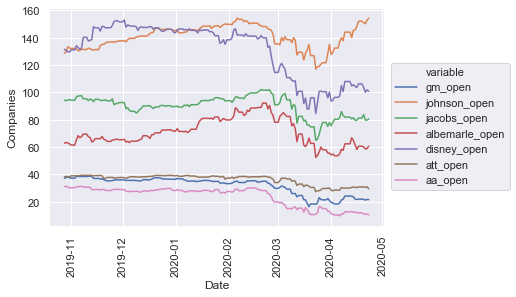

In [52]:
# Columns from dataframe are separated in order to plot.
tempdf = data[['date_time', 'gm_open', 'johnson_open', 'jacobs_open', 'albemarle_open', 'disney_open', 'att_open', 'aa_open']]

# Using Seaborn library, lineplot is plotted. Given appropriate x label, y label and moved legend to the right of plot.
sns.lineplot(x='date_time', y='value', hue='variable', data=pd.melt(tempdf, ['date_time']))
plt.legend(bbox_to_anchor=(1.02, 0.75), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Companies")

#                                             Thank You !